In [13]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2

In [14]:
classes=['Dang','Fist','Four','Palm','Startrek']

In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32,3)
        self.conv2=nn.Conv2d(32,64,3)
        self.conv3=nn.Conv2d(64,128,3)

        x=torch.randn(28,28).view(-1,1,28,28)
        self.to_linear=None
        self.convs(x)
        
        self.fc1=nn.Linear(self.to_linear,512)
        self.fc2=nn.Linear(512,5)
            
        
    def convs(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        
        if self.to_linear is None:
            self.to_linear=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return(x)
    
    def forward(self,x):
        x=self.convs(x)
        x=x.view(-1,self.to_linear)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        
        return F.softmax(x,dim=1)

In [16]:
hand_sign_net=torch.load("full.pth")

(144, 176, 3)
Four


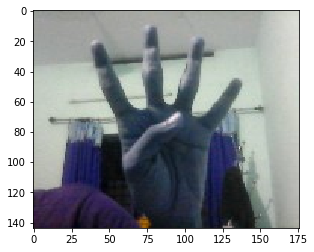

In [18]:
import numpy as np

img=cv2.imread("four.jpg")
plt.imshow(img,cmap='gray')
print(img.shape)
detect(img)

In [19]:
def detect(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(28,28))
    img=np.array(img)
    with torch.no_grad():    
        img=torch.Tensor(img).view(-1,28,28)
        out=hand_sign_net(img.view(-1,1,28,28))[0]
        return(classes[torch.argmax(out)])

In [24]:
import cv2
video=cv2.VideoCapture(0)
while True:
    _,frame=video.read()
    cv2.rectangle(frame,(100,100),(400,400),(0,0,255),2)
    cut_frame=frame[100:400,100:400]
    text=str(detect(cut_frame))
    cv2.putText(frame,text,(420,400),cv2.FONT_HERSHEY_DUPLEX,1,(0,0,255),2)
    cv2.imshow('win',frame)
    if cv2.waitKey(10) & 0xff==ord('q'):
        break
video.release()
cv2.destroyAllWindows()

